# Final Project Submission
* Student name: Miguel Santana
* Student pace: Full Time
* Scheduled project review date/time: 10/14/2020, 12-12:45pm
* Instructor name: James Irving
* Blog post URL: TBA

# Project Methodology & Goal
The following dataset was retrieved from Kaggle. A Portuguese banking institution provided data regarding a direct marketing campaign with the goal of predicting subscriber term deposits. The following will include an in depth analysis of the client, campaign, social, economic and additional features that lend to predicting whether a client will subscribe a term deposit. The analysis culminate in business recommendations that will drive our target variable.  

The information was found on kaggle at: https://www.kaggle.com/henriqueyamahata/bank-marketing

Dataset originally from: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

# Data Analysis and Modeling
OSEMN Framework
* Obtain
* Scrub
* Explore
* Model
* INterpret

# OBTAIN

## Python Project Libraries
Importing Packages & Processing our Dataset

In [1]:
# Math, Visualizations, Cleaning and Analysis
import pandas as pd # data cleaning and manipulation
import numpy as np # numerical operations  
import seaborn as sns # visualizations / plt.style.use('seaborn-poster') 
#sns.set(style='whitegrid')
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
# pd.set_option('display.max_columns',0)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings("ignore")

/Users/miguelsantana/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

## Variable Key
The Kaggle dataset lists the following bank client attributes:

**Client Data**
* Age
* Job Type
* Marital Status
* Education 
* Default **(client credit in default)**
* Housing **(client housing loan)**
* Loan **(client personal loan)**

**Current Campaign | Last Contact** 
* Contact Type
* Month 
* Day of Week 
* Duration (in seconds)

**Other Attributes:**
* Campaign (number of contacts/this campaign)
* Pdays (days since last contacted/previous campaign)
* Previous (contacts performed before this campaign/this client)
* Poutcome (previous campaign outcome)

**Social & Economic Context Attributes**
* Emp.var.rate (quarterly employment variation rate)
* Cons.price.idx (monthly indicator - consumer price index)
* Cons.conf.idx (monthly indicator - consumer confidence index)
* Euribor3m (daily indicator - euribor 3 month rate)
* Nr.employed (quarterly indicator - number of employees)

**Output/Target**
* y (has the client subscribed a term deposit?)

In [3]:
df = df.rename(columns={'y':'term_deposit'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# SCRUB

In [5]:
for col in df.columns: # preliminary view of value counts per column
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

age 31    1947
32    1846
33    1833
36    1780
35    1759
Name: age, dtype: int64


job admin.         10422
blue-collar     9254
technician      6743
services        3969
management      2924
Name: job, dtype: int64


marital married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


education university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
Name: education, dtype: int64


default no         32588
unknown     8597
yes            3
Name: default, dtype: int64


housing yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


loan no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


contact cellular     26144
telephone    15044
Name: contact, dtype: int64


month may    13769
jul     7174
aug     6178
jun     5318
nov     4101
Name: month, dtype: int64


day_of_week thu    8623
mon    8514
wed    8134

## Null Values

In [6]:
# df.isnull().sum()
df.isnull().values.any() # Checking for nulls

False

<div class="alert alert-success">

There are no missing values in the dataset. There are a substantial amount of "unknown" values which will need to be addressed.  

</div> 

## Addressing Unknown Variables

In [7]:
df.shape
# df['term_deposit'].value_counts()

(41188, 21)

Unknown Values Per Column:
   
   job type: 330 
   
   marital status: 80
   
   education: 1731
   
   default (client credit in default): 8597
   
   housing (client housing loan): 990
   
   loan (client personal loan): 990
   
Total: 12718 or 30.88%

<div class="alert alert-success">

In order to narrow down my dataset I will drop the "unknown" values from the job, marital and education columns. 

</div> 

In [8]:
# dropping unknown variables from 3 columns
def dr_unknown(df, col_name):
    start_len = len(df)
    new_df = df.loc[(df[col_name] != 'unknown')]
    print(f'There were {start_len - len(new_df)} unknown values removed from {col_name}')
    return new_df

In [9]:
remove_job = dr_unknown(df, 'job')

There were 330 unknown values removed from job


In [10]:
remove_marital = dr_unknown(remove_job, 'marital')

There were 71 unknown values removed from marital


In [11]:
remove_education = dr_unknown(remove_marital, 'education')

There were 1596 unknown values removed from education


In [12]:
df = remove_education
df.shape

(39191, 21)

## Outlier Removal

The outlier removal will be centered on age

In [13]:
# IQR Outlier Removal Function
def iqr_outlier_rem(df, col_name):
    start_len = len(df)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1 # Finding interquartile range
    lower_threshold  = Q1-1.5*IQR
    upper_threshold = Q3+1.5*IQR
    new_df = df.loc[(df[col_name] > lower_threshold) & (df[col_name] < upper_threshold)]
    print(f'There were {start_len - len(new_df)} outliers removed from {col_name}')
    return new_df

In [14]:
df = iqr_outlier_rem(df, 'age')

There were 421 outliers removed from age


In [15]:
print(df.shape)
df['age'].describe()

(38770, 21)


count    38770.000000
mean        39.456719
std          9.573504
min         17.000000
25%         32.000000
50%         38.000000
75%         46.000000
max         69.000000
Name: age, dtype: float64

<div class="alert alert-success">

The dataset now represents clients between the ages of 17 and 69 with a specific job status, marital status and education level. 

After the dropping of unknown values (from 3 columns) and outlier removal our dataset represents over 94% of the original dataset.

</div> 

# Exploratory Data Analysis

## Exploring Term Deposits By Job, Education & Marital Status

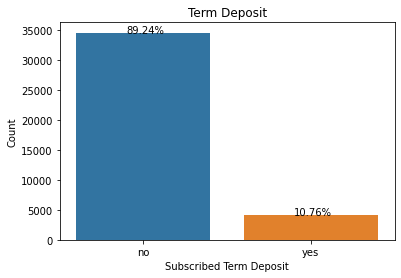

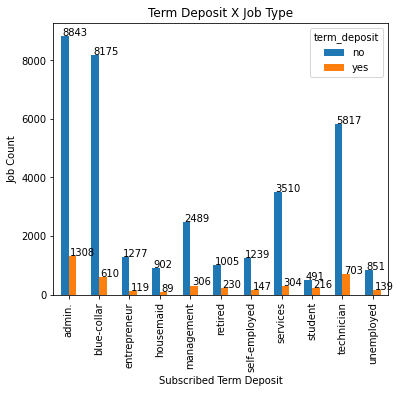

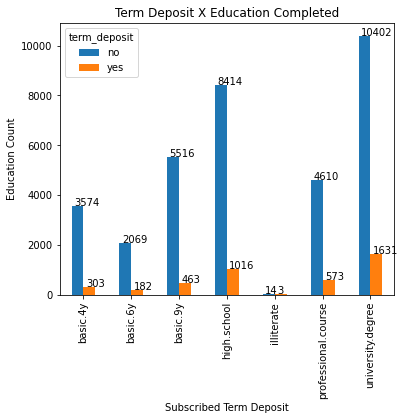

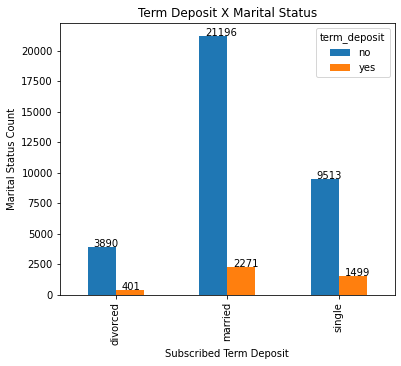

In [16]:
# plt.figure(figsize=(20,20))

ax1 = sns.countplot(x='term_deposit',data=df)
ax1.set(xlabel='Subscribed Term Deposit', ylabel='Count', title='Term Deposit')
for p in ax1.patches:
        ax1.annotate('{:.2f}%'.format((p.get_height()/df.shape[0])*100), (p.get_x()+0.3, p.get_height()))

ax2 = df.groupby(['job', 'term_deposit']).size().unstack().plot(kind='bar', stacked=False,figsize=(6,5))
ax2.set(xlabel='Subscribed Term Deposit', ylabel='Job Count', title='Term Deposit X Job Type')
for i in ax2.patches:
    ax2.text(i.get_x()+0.05, i.get_height()+20,str(i.get_height()))

ax3 = df.groupby(['education', 'term_deposit']).size().unstack().plot(kind='bar', stacked=False,figsize=(6,5))
ax3.set(xlabel='Subscribed Term Deposit', ylabel='Education Count', title='Term Deposit X Education Completed')
for i in ax3.patches:
    ax3.text(i.get_x()+0.05, i.get_height()+20,str(i.get_height()))

ax4 = df.groupby(['marital', 'term_deposit']).size().unstack().plot(kind='bar', stacked=False,figsize=(6,5))
ax4.set(xlabel='Subscribed Term Deposit', ylabel='Marital Status Count', title='Term Deposit X Marital Status')
for i in ax4.patches:
    ax4.text(i.get_x()+0.05, i.get_height()+20,str(i.get_height()))

# plt.subplots_adjust(wspace=0.5)
# plt.show()

<div class="alert alert-success">

Observations
* The data is unbalanced with just under 11 percent of clients subscribing for a term deposit.
* Some client jobs hold a closer no/yes ratio regarding term deposits. The four jobs with the largest variation are: admin, blue-collar, services and technician.  
* The gap between no and yes variables appears to grow the more education a client has completed. Professional course and basic 6 year are the exception. 
* The majority of the dataset is represented by married couples with the greatest no/yes ratio existing in the "divorced" category.

</div>

## Exploring Last Contact

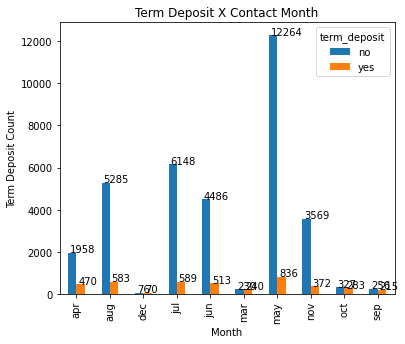

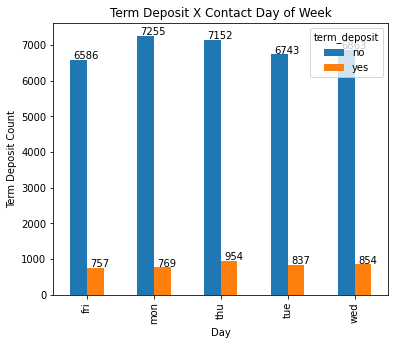

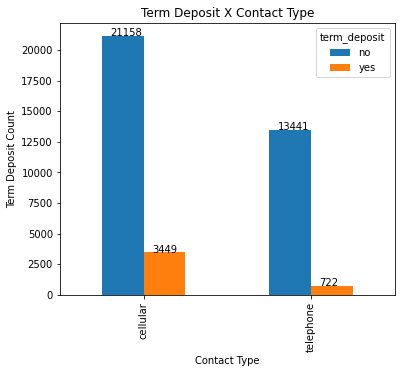

In [17]:
# plt.figure(figsize=(20,20))

ax1 = df.groupby(['month', 'term_deposit']).size().unstack().plot(kind='bar', stacked=False,figsize=(6,5))
ax1.set(xlabel='Month', ylabel='Term Deposit Count', title='Term Deposit X Contact Month')
for i in ax1.patches:
    ax1.text(i.get_x()+0.05, i.get_height()+20,str(i.get_height()))

ax2 = df.groupby(['day_of_week', 'term_deposit']).size().unstack().plot(kind='bar', stacked=False,figsize=(6,5))
ax2.set(xlabel='Day', ylabel='Term Deposit Count', title='Term Deposit X Contact Day of Week')
for i in ax2.patches:
    ax2.text(i.get_x()+0.05, i.get_height()+20,str(i.get_height()))

ax3 = df.groupby(['contact', 'term_deposit']).size().unstack().plot(kind='bar', stacked=False,figsize=(6,5))
ax3.set(xlabel='Contact Type', ylabel='Term Deposit Count', title='Term Deposit X Contact Type')
for i in ax3.patches:
    ax3.text(i.get_x()+0.05, i.get_height()+20,str(i.get_height()))

# plt.subplots_adjust(wspace=0.5)
# plt.show()

<div class="alert alert-success">

Observations
* There is a wide distribution of data when considering term deposits per month. The months with the most even distribution of yes/no are March, September, October and December.
* There is no distinguishable difference in term deposits per day of the week. 
* The data illustrates higher odds of a subscriber term deposit when clients are reached via cell phone versus telephone. This may be due to changes in technology as less consumers maintain an active land line phone at home. 

</div>

## Exploring Other Attributes

<div class="alert alert-success">

The dataset will be separated in order to show features that are representative of a "yes" in our target variable.

</div> 

In [18]:
yesdf = df[df['term_deposit'] == 'yes']
nodf = df[df['term_deposit'] == 'no']

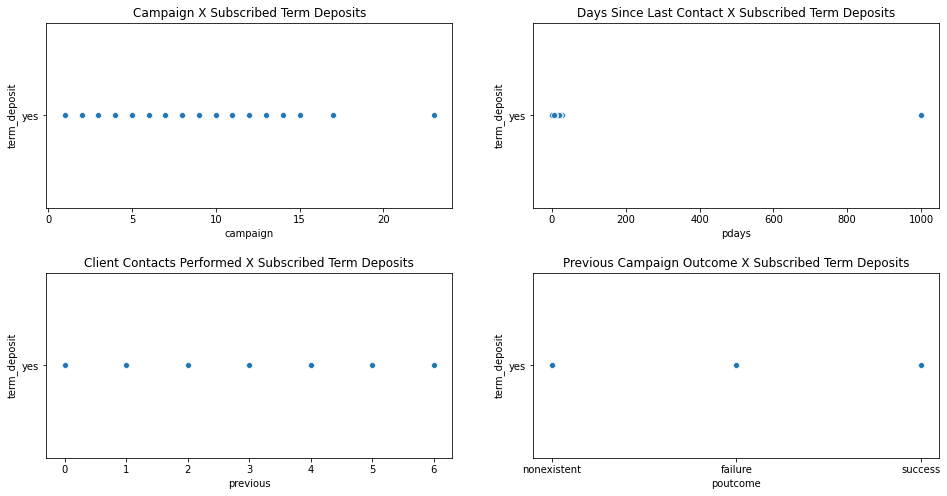

In [19]:
# consider making two dataframes df1 for yes target and df2 for no target
# then plotting

plt.figure(figsize=(16,8))
plt.subplot(221)
sns.scatterplot(yesdf.campaign, yesdf.term_deposit)
plt.title('Campaign X Subscribed Term Deposits')
plt.subplot(222)
sns.scatterplot(yesdf.pdays, yesdf.term_deposit)
plt.title('Days Since Last Contact X Subscribed Term Deposits')
plt.subplot(223)
sns.scatterplot(yesdf.previous, yesdf.term_deposit)
plt.title('Client Contacts Performed X Subscribed Term Deposits')
plt.subplot(224)
sns.scatterplot(yesdf.poutcome, yesdf.term_deposit)
plt.title('Previous Campaign Outcome X Subscribed Term Deposits')

plt.subplots_adjust(hspace=0.35)
plt.show()

## Exploring Social & Economic Context

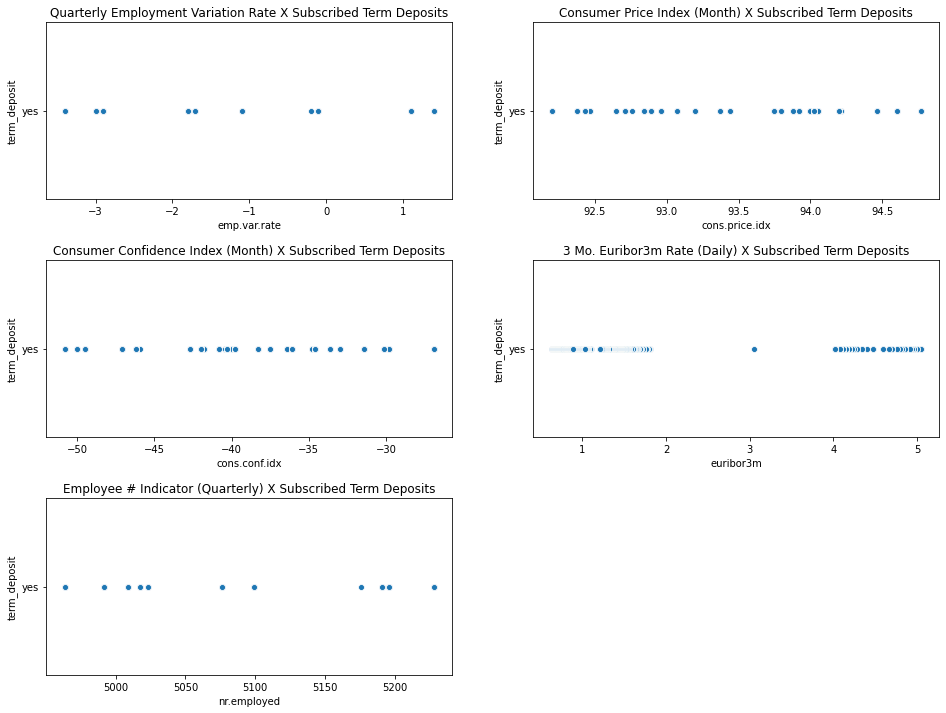

In [20]:
# consider making two dataframes df1 for yes target and df2 for no target
# then plotting

plt.figure(figsize=(16,12))
plt.subplot(321)
sns.scatterplot(yesdf['emp.var.rate'], yesdf.term_deposit)
plt.title('Quarterly Employment Variation Rate X Subscribed Term Deposits')


plt.subplot(322)
sns.scatterplot(yesdf['cons.price.idx'], yesdf.term_deposit)
plt.title('Consumer Price Index (Month) X Subscribed Term Deposits')


plt.subplot(323)
sns.scatterplot(yesdf['cons.conf.idx'], yesdf.term_deposit)
plt.title('Consumer Confidence Index (Month) X Subscribed Term Deposits')


plt.subplot(324)
sns.scatterplot(yesdf.euribor3m, yesdf.term_deposit)
plt.title('3 Mo. Euribor3m Rate (Daily) X Subscribed Term Deposits')

plt.subplot(325)
sns.scatterplot(yesdf['nr.employed'], yesdf.term_deposit)
plt.title('Employee # Indicator (Quarterly) X Subscribed Term Deposits')

plt.subplots_adjust(hspace=0.35)
plt.show()

# Data Preparation

## Notable Data Columns / Feature Conversions 
* Education - variables will be converted to numerical
* Duration - a duration of zero directly ties to the target 'no' (remove before modeling)
* Pdays - a value of 999 means the customer has not been contacted. 

In [21]:
df['education'].replace({'illiterate': 0, 
                         'basic.4y': 4, 'basic.6y': 6, 
                         'basic.9y': 9, 'high.school': 12, 
                         'professional.course': 14, 
                         'university.degree': 16}, inplace=True)

# df['education'].value_counts()

In [22]:
# df.replace({'job': {'unknown':'that'}, 
#             'marital': {'unknown':'that'}, 
#             'education': {'unknown':'that'}, 
#             'default': {'unknown':'that'}, 
#             'housing': {'unknown':'that'},
#             'loan': {'unknown':'that'}}, inplace = True)

## Dropping Features

In [23]:
# drop duration per dataset guidelines / drop columns with negative values
df = df.drop(['duration', 'emp.var.rate', 'cons.conf.idx'], axis=1)

## Column Names

In [24]:
# cleaning column names
subs = [(' ', '_'),('.0',''),('.','')]

def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

In [ ]:
# df.head()

## Multicollinearity

In [ ]:
corr = df.corr() # analyzing correlation
# corr
fig, ax = plt.subplots(figsize=(18,26))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, square=True, annot=True, cmap="YlGnBu")
#xticklabels=labels, yticklabels=labels)
#plt.xticks(rotation=-45, fontsize=16)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')
ax.set_title("Correlation & Heat Map", fontsize=15, fontfamily="serif")
plt.show()

In [ ]:
# dropping feature to address multicollinearity 
df = df.drop(['euribor3m'], axis=1)

## Categorical Features / One-Hot Encoding

In [ ]:
catfeats = df.select_dtypes('object').columns # selecting the numerical columns for observation
catfeats

In [ ]:
# One Hot Encode
df = pd.get_dummies(df, drop_first=True)

### Casting Datatypes

In [ ]:
# changing uint8 data types back to categorical variables 
for cat_cols in df.iloc[:,7:].columns:
         df[cat_cols] = df[cat_cols].astype('category')

# Model

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Test/Train Split / Standardize Data

In [ ]:
# Separate target and features
y = df['term_deposit_yes']
X = df.drop(['term_deposit_yes'], axis=1) 

In [ ]:
# standardize the data
scaler = StandardScaler() # transform "X" features
X_scaled = scaler.fit_transform(X)

In [ ]:
# Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0) 

## Logistic Regression

In [ ]:
%%time 
# observing time lapse - running classifiers

# logistic regression classifier
# liblinear supports l2 regularization
lr = LogisticRegression(penalty='l2', solver='liblinear') 

# Fit the model
fit = lr.fit(X_train, y_train)

pred_y = lr.predict(X_test) 

lrs = round(lr.score(X_test, y_test)*100,2) # format accuracy score
print('\nAccuracy Percentage:', lrs)


print('\nActual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y))

## Catboost

In [ ]:
%%time 
from catboost import CatBoostClassifier # Import library
catmodel = CatBoostClassifier(
    custom_loss=['Accuracy'], # Metric to use in training
    random_seed=0, # Consistent with other random seeds
    logging_level='Silent' # We already have the time function to show time elapsed
)
catmodel.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    plot=False
); #fit model

catscore = round(catmodel.score(X_test, y_test) * 100, 2) #round score 
print('\nAccuracy Percentage:', catscore)


pred_y_cat = catmodel.predict(X_test)
print('\nActual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_cat, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_cat))

## K-Nearest Neighbors

In [ ]:
%%time 

knn = KNeighborsClassifier()
knn.fit(X_train, y_train) #fit model

knn_score = round(knn.score(X_test, y_test) * 100, 2) #round score
print('\nAccuracy Percentage:', knn_score)

pred_y_knn = knn.predict(X_test) 

print('\n Actual vs. Predicted \n') # Confusion matrix
print(pd.crosstab(y_test, pred_y_knn, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_knn)) 

## Support Vector Machine

In [ ]:
%%time 

# Linear SVC/SupportVectorMachine 
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
linear_svc_score = round(linear_svc.score(X_test, y_test) * 100, 2) #round score
print('\nAccuracy Percentage:', linear_svc_score)


pred_y_svc = linear_svc.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_svc, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_svc))

## Guassian Naive Bayes

In [ ]:
%%time 

clf = GaussianNB() #gaissian naive bayes
clf.fit(X_train, y_train) #fit the model

clf_score = round(clf.score(X_test, y_test) * 100, 2)
print("Accuracy Percentage: ", clf_score)

pred_y_clf = clf.predict(X_test) #y predicted

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_clf, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_clf))

## Decision Tree

In [ ]:
%%time 

decision_tree = DecisionTreeClassifier()# Decision Tree 
decision_tree.fit(X_train, y_train) #fit the model
decision_tree_score = round(decision_tree.score(X_test, y_test) * 100, 2) #round the result
print("Accuracy Percentage: ", decision_tree_score)

pred_y_decision_tree = decision_tree.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_decision_tree, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_decision_tree))

## Random Forest

In [ ]:
%%time 

random_forest = RandomForestClassifier(n_estimators=100) # random forest 
random_forest.fit(X_train, y_train) #fit the model
random_forest_score = round(random_forest.score(X_test, y_test) * 100, 2) #round the result
print("Accuracy Percentage: ", random_forest_score)

pred_y_random_forest = random_forest.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab( y_test, pred_y_random_forest, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_random_forest))

## Gradient Boosting

In [ ]:
%%time 


clf_gb = GradientBoostingClassifier(n_estimators=100, 
                                 max_depth=1, 
                                 random_state=0)
clf_gb.fit(X_train, y_train)
clf_gb_score = round(clf_gb.score(X_test, y_test) * 100, 2)
print("Accuracy Percentage: ", clf_gb_score)


pred_y_clf_gb = clf_gb.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_clf_gb, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_clf_gb))

## Adaboost

In [ ]:
%%time 

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), 
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(X_train, y_train) #fit model
bdt_score = round(bdt.score(X_test, y_test) * 100, 2) #round score
print("Accuracy Percentage: ", bdt_score) #4:45


pred_y_bdt = bdt.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab( y_test, pred_y_bdt, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_bdt))

# Interpret Models

In [ ]:
# results dataframe
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'KNN', 
              'Random Forest', 
              'Gaussian Naive Bayes',
              'Linear SVC (SVM)', 
              'Decision Tree', 
              'AdaBoostClassifier', 
              'GradientBoostingClassifier',
              'CatBoost',
             ],
    'Score': [lrs, 
              knn_score, 
              random_forest_score, 
              clf_score,
              linear_svc_score, 
              decision_tree_score,
              bdt_score, 
              clf_gb_score, 
              catscore,
             ]})

models.sort_values(by='Score', ascending=False) #sorting by score

<div class="alert alert-success">

It looks like Catboost is the most accurate with Logistic Regression coming in incredibly close at second. Gradient Boosting Classifier comes in at third place with Support Vector Machine coming at a close 4th place. The least accurate is 
Gaussian Naive Bayes coming in 25 points lower than Catboost.

</div>

## Random Forest Pipeline with GridSearchCV
Let's see if we can improve our results at all using GridSearch. Gridsearch will run and compare each combination of parameters in a set of parameters that we choose.

In [ ]:
y_pipe = df['term_deposit_yes']
X_pipe = df.drop(['term_deposit_yes'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X_pipe, y_pipe, test_size=0.2, random_state=0)

In [ ]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA 

# Creating a pipeline
rf_pipe = Pipeline([('scl', StandardScaler()),
                 ('pca', PCA(n_components=5)), #arbitrary number
                 ('clf', RandomForestClassifier(random_state = 0))])


# Set grid search params
rf_grid_param = [ 
  {'clf__n_estimators': [100], 
   'clf__max_features': ['auto', 'sqrt'],
   'clf__max_depth': [None],  
   'clf__min_samples_leaf':[1, 2],   
   'clf__min_samples_split':[2, 10],
  }
]

# Construct grid search
rf_gridsearch = GridSearchCV(estimator=rf_pipe,
            param_grid=rf_grid_param,
            scoring='accuracy',
            cv=3, verbose=2)

# Fit using grid search
rf_gridsearch.fit(X_train, y_train)

In [ ]:
# print best parameters
print('\nBest params:\n', rf_gridsearch.best_params_)

In [ ]:
%%time 
#applying best parameters to model
random_forest = RandomForestClassifier(n_estimators=100, max_features='sqrt', min_samples_leaf= 2, min_samples_split= 10) # random forest 
random_forest.fit(X_train, y_train) #fit the model
random_forest_score = round(random_forest.score(X_test, y_test) * 100, 2) #round the result
print("Accuracy Percentage: ", random_forest_score)

<div class="alert alert-success">

Gridsearch CV did not raise the accuracy of the model. Let's see if we can improve the accuracy in some of our other models by addressing our class imbalance problem.

</div>

## Class Imbalance

In [ ]:
# visualizing churn
plt.bar(['No Term Deposit', 'Term Deposit'], df.term_deposit_yes.value_counts().values, facecolor = 'blue',  linewidth=0.5)
plt.title('Target Variable (Subscribed Term Deposits)', fontsize=16)
plt.xlabel('Classes')
plt.ylabel('Total Count')
plt.show()

<div class="alert alert-success">

The graph above highlights that there is a a pretty high level of imbalance. We can remedy this using SMOTE.

</div>

## SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
# Separate target and features
y = df['term_deposit_yes']
X = df.drop(['term_deposit_yes'], axis=1) 

In [ ]:
X_scaled = scaler.fit_transform(X) #scale data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0) #test/train split

In [ ]:
from imblearn.over_sampling import SMOTE #import smote

In [ ]:
smote = SMOTE(random_state=0) #random state 0 for consistency

In [ ]:
%%time

X_res, y_res = smote.fit_resample(X_train, y_train) #fitting smote to our train sets

In [ ]:
# Updated bar graph to display amount of failed vs. successful campaigns post-SMOTE
plt.bar(['Customer Retention', 'Customer Churn'], [sum(y_res), len(y_res)-sum(y_res)], facecolor = 'green',  linewidth=0.5)
plt.title('Post-SMOTE Target Variable (Success)\n', fontsize=16)
plt.xlabel('Classes')
plt.ylabel('Number of Campaigns')
plt.show()

<div class="alert alert-success">

It looks like our classes are balanced now. Let's proceed.

</div>

In [ ]:
%%time

#just a few classifiers for sake of time
l_r = LogisticRegression(penalty='l2', solver='liblinear')
randomforest = RandomForestClassifier(n_estimators=100)
cat_model = CatBoostClassifier(
    custom_loss=['Accuracy'], # metric to use in training
    random_seed=0, # consistent with other random seeds
    logging_level='Silent' # time function will show time lapse
)
decisiontree = DecisionTreeClassifier()

classifiers = [l_r, randomforest, cat_model, decisiontree] # list of classifiers
classifiers_names = ['Logistic Regression', 'Random Forest','Cat Model', 'Decision Tree'] # respective names

In [ ]:
%%time 

# iterating through a list of classifiers and appending their accuracy levels to a list of scores
scores = []
for i in range(len(classifiers)):
    classifiers[i].fit(X_res, y_res)
    scores.append(round(classifiers[i].score(X_test, y_test), 3))

In [ ]:
# dataframe to compare results
dfsmote = pd.DataFrame({'Model': classifiers_names, 'Score': scores})

dfsmote.sort_values(by='Score', ascending=False) # sorting models by score

<div class="alert alert-success">

The models performed worse than they did initially. SMOTE wasn't particularly worth it as it did not significantly impact model performance. 

</div>

# Feature Importance of Top Classifiers

Now that we know which classifiers have the most accuracy with our data, let's compare which features were the most important in the top three models: Catboost, Logistic Regression, and Gradient Boosting Classifier.

## Catboost Features

In [ ]:
# Feature Importance
cat_feature = pd.DataFrame({'Importance': catmodel.feature_importances_, 'Column': X.columns}) # new dataframe
cat_feature = cat_feature.sort_values(by='Importance', ascending=False) # results highest to lowest
print('Catboost Top 25 Features')
cat_feature[:25] # top 25 features

In [ ]:
cat_feature = cat_feature[:25] # top 25 features
cat_feature.plot(kind='barh', x='Column', y='Importance', figsize=(20, 10), cmap = 'coolwarm')
plt.title('Catboost Feature Importance \n', fontsize=16)
plt.show()

## Random Forest Features

In [ ]:
# Feature Importance
rf_feature = pd.DataFrame({'Importance': random_forest.feature_importances_, 'Column': X.columns}) #create new dataframe
rf_feature = rf_feature.sort_values(by='Importance', ascending=False) #display results highest to lowest
print('Random Forest Top 25 Features')
rf_feature[:25] #top 25 features

In [ ]:
rf_feature = rf_feature[:25] #top 25 features
rf_feature.plot(kind='barh', x='Column', y='Importance', figsize=(20, 10), cmap= 'ocean')
plt.title('Random Forest Feature Importance \n', fontsize=16)
plt.show()

## Overlap

In [ ]:
# Creating lists / top 25 features in each classifier 
cat = cat_feature.Column.unique() 
rf = rf_feature.Column.unique()

In [ ]:
set(cat) & set(rf) # items appearing in both lists

<div class="alert alert-success">

There are 23 total items that appear in both classifier feature lists. 

The most important features in both lists are:
* **Number of employees | quarterly indicator (nremployed)**
* **Consumer Price Index | monthly indicator (conspriceidx)**
* **Age**

</div>

In [ ]:
yesdf.head()

In [ ]:
print('Subscriber Term Deposits X Number of Employees (Quarterly)')
print(yesdf['nr.employed'].value_counts())
yesdf['nr.employed'].hist(figsize = (8,8), color = "blue"); #let's make a histogram to compare
plt.title('Subscriber Term Deposits X Number of Employees (Quarterly)', fontdict={'fontsize': 16});

In [ ]:
print('Subscriber Term Deposits X Consumer Price Index (Monthly)')
print(yesdf['cons.price.idx'].value_counts())
yesdf['cons.price.idx'].hist(figsize = (8,8), color = "red"); #let's make a histogram to compare
plt.title('Subscriber Term Deposits X Consumer Price Index (Monthly)', fontdict={'fontsize': 16});

In [ ]:
print('Age')
print(yesdf['age'].value_counts())
yesdf['age'].hist(figsize = (8,8), color = "green"); #let's make a histogram to compare
plt.title('Subscriber Term Deposits X Age', fontdict={'fontsize': 16});

# Conclusion Business Insights and Future Work

The dataset and given business insights relay specifically to a client base that cites their specific job type, marital status and education level. Additionally, the models and features reflect a client that is between 17-69 years of age. 

**Subscriber term deposits are highest when the number of quarterly employees are at least 5099 but not over 5228. In addition, consumer price index should be between 92.89 and 93.08. Lastly, clients between the ages of 30-40 are the most likely to subscribe term deposits.**

Future work: In order to more accurately define the boundaries of our features it is important to understand what customs and cultural influences are tied to this dataset (Portuguese banking info). For example: knowing the average level of education, the geographic locations of client residences and information on financial markets in this region may alter the way we perceive each of these variables.